In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv('/content/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


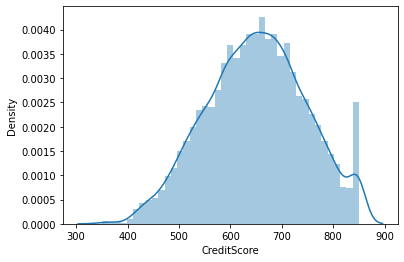

In [6]:
#univariate analysis
sns.distplot(data['CreditScore'])

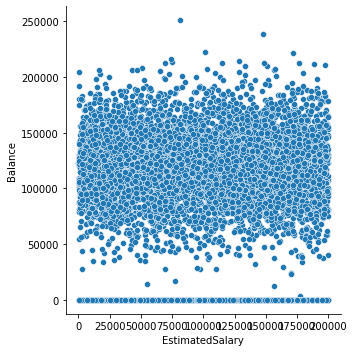

In [7]:
#bivariate analysis
sns.relplot(x='EstimatedSalary',y="Balance", data=data)

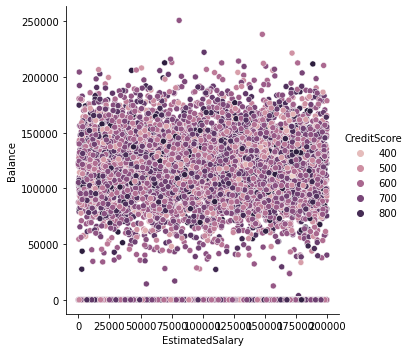

In [8]:
# multi variate 
sns.relplot(x='EstimatedSalary',y="Balance", hue = "CreditScore", data=data)

In [11]:
#Descriptive statistics
#sum of exited
data['Exited'].sum()

2037

In [12]:
#Average of Age
data['Age'].mean()

38.9218

In [13]:
#Standard Deviation of Estimated salary
data['EstimatedSalary'].std()

57510.49281769816

In [14]:
#Median of Estimated Salary
data['EstimatedSalary'].median()

100193.915

In [17]:
#Maximum and Minimum of CreditScores
print("max=",data['CreditScore'].max(),"min=",data['CreditScore'].min())

max= 850 min= 350


In [20]:
data.isnull().sum()
#No null values 
data['CreditScore'].fillna(data['CreditScore'].mean())
#filling null values with mean

0       619
1       608
2       502
3       699
4       850
       ... 
9995    771
9996    516
9997    709
9998    772
9999    792
Name: CreditScore, Length: 10000, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


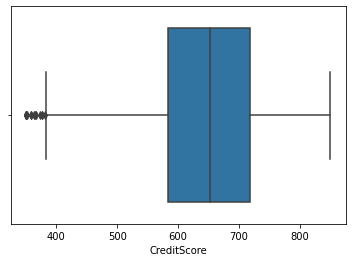

In [27]:
sns.boxplot(data['CreditScore'])

In [33]:
#removing and replacing outliers
percentile25 = data['CreditScore'].quantile(0.25)
percentile75 = data['CreditScore'].quantile(0.75)
iqr=percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

data[data['CreditScore'] > upper_limit]
data[data['CreditScore'] < lower_limit]

new_df = data[(data['CreditScore'] < upper_limit) & (data['CreditScore']>lower_limit)]
new_df.shape

(9984, 14)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


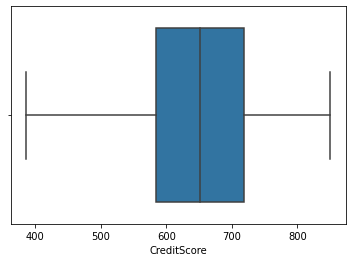

In [34]:
sns.boxplot(new_df['CreditScore'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


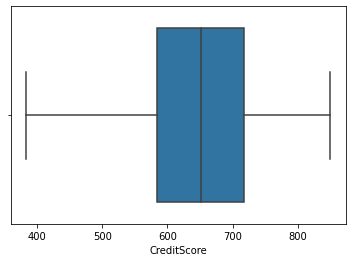

In [36]:
new_df_cap = data.copy()
new_df_cap['CreditScore'] = np.where(
    new_df_cap['CreditScore'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['CreditScore'] < lower_limit,
        lower_limit,
        new_df_cap['CreditScore']
    )
)
sns.boxplot(new_df_cap['CreditScore'])

In [43]:
#categorical to numerical
data['Gender'].replace({'Male':0, 'Female':1}, inplace=True)
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,0,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,0,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,1,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,0,42,3,75075.31,2,1,0,92888.52,1


In [45]:
#independent variables
x=data.loc[:, ['CreditScore', 'HasCrCard','IsActiveMember']]
#dependent variable
y=data.loc[:,'Exited']

In [46]:
import sklearn

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=0)

In [48]:
x_train

,CreditScore,HasCrCard,IsActiveMember
7809,579,1,1
5279,652,1,1
3279,652,1,0
8984,645,1,0
8466,613,0,0
...,...,...,...
9225,594,1,1
4859,794,1,1
3264,738,1,0
9845,590,1,1


In [49]:
x_test

,CreditScore,HasCrCard,IsActiveMember
9394,597,1,1
898,523,1,0
2398,706,1,1
5906,788,0,0
2343,706,1,1
...,...,...,...
4758,493,1,0
9914,496,1,0
7067,746,0,1
4578,691,0,0


In [50]:
y_train

7809    1
5279    0
3279    0
8984    0
8466    0
       ..
9225    0
4859    0
3264    0
9845    0
2732    1
Name: Exited, Length: 6000, dtype: int64

In [51]:
y_test

9394    0
898     1
2398    0
5906    0
2343    0
       ..
4758    0
9914    0
7067    0
4578    0
4202    0
Name: Exited, Length: 4000, dtype: int64